In [111]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats

In [112]:
arquivo = open("amber-heat-9880-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [113]:
for k,v in dados_fire["logs"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [114]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [115]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [116]:
dataframe


,tempo,tipo,user_id,versao
0,1479314413137,final,2754007705,B
1,1479334139633,inicio,3821711656,A
2,1479313593732,inicio,777092727,A
3,1479320178206,inicio,1760317513,B
4,1479320234523,inicio,1760317513,B
5,1479326608878,inicio,3642268329,B
6,1479311996409,inicio,632896313,A
7,1479311976841,inicio,1690681371,A
8,1478614188868,inicio,2820165946,B
9,1479326639681,final,3642268329,B


In [117]:
agrupado = dataframe.groupby(by=["user_id", "versao"])


In [118]:
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once


In [119]:
users = list(users) 


In [120]:

resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})
            

In [121]:
grupo1.sort_values(by="tempo")


,tempo,tipo,user_id,versao
69,1479312807347,inicio,760489599,B


In [122]:
dataframe_resumo = pd.DataFrame.from_records(resultados)


In [123]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos


In [124]:
dataframe_resumo


,delta_t,user_id,versao
0,23.433,1561760900,A
1,10.218,1450913925,B
2,27387.295,63178631,A
3,35.695,3789181448,B
4,68.229,3688875147,B
5,96.267,2873078540,B
6,55.992,212358778,B
7,25.222,67376665,B
8,79.083,2754007705,B
9,79.994,2777860250,A


(array([ 1.,  2.,  2.,  3.,  2.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.]),
 array([   0.        ,   10.34482759,   20.68965517,   31.03448276,
          41.37931034,   51.72413793,   62.06896552,   72.4137931 ,
          82.75862069,   93.10344828,  103.44827586,  113.79310345,
         124.13793103,  134.48275862,  144.82758621,  155.17241379,
         165.51724138,  175.86206897,  186.20689655,  196.55172414,
         206.89655172,  217.24137931,  227.5862069 ,  237.93103448,
         248.27586207,  258.62068966,  268.96551724,  279.31034483,
         289.65517241,  300.        ]),
 <a list of 29 Patch objects>)

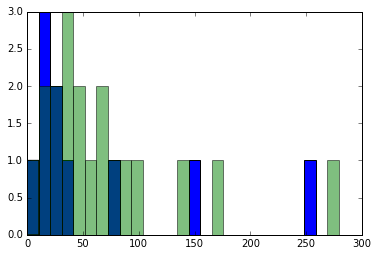

In [125]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)

TEMPO = np.linspace(0,300,30)

#Excluindo os tempos discrepantes.

tempos_A1=[]
tempos_B1=[]
for i in tempos_A:
    if (i<400):
        tempos_A1.append(i)
        
for t in tempos_B:
    if (t<400):
        tempos_B1.append(t)

plt.hist(tempos_A1, bins=TEMPO)
plt.hist(tempos_B1, bins=TEMPO, alpha=0.5)

Teste de hipótese:
u0 : uA = uB ~ hipótese nula
u1 : uB > uA ~ hipótese alternativa
alfa = 5% ~ 0.05


Cálculo das Médias Amostrais, Desvios Padrões e Variâncias:

In [126]:
totalA = 0
nA=0
for i in tempos_A1:
    nA+=1
    totalA += i
mediaA = total/nA


totalB = 0
nB = 0
for i in tempos_B1:
    nB+=1
    totalB += i
mediaB = totalB/nB

print("A média amostral do site A é {}".format(mediaA))
print("A média amostral do site B é {}".format(mediaB))




A média amostral do site A é 61.932900000000004
A média amostral do site B é 70.62373684210526


In [127]:
VarA = np.var(tempos_A1)
VarB =np.var(tempos_B1)

print("A variância do site A é {}".format(VarA))
print("A variância do site B é {}".format(VarB))

A variância do site A é 5923.626789489999
A variância do site B é 4015.9824800886427


In [128]:
dpA = np.var(tempos_A1)**0.5
dpB =np.var(tempos_B1)**0.5

print("O desvio padrão do site A é {}".format(dpA))
print("O desvio padrão do site B é {}".format(dpB))

O desvio padrão do site A é 76.9651011140114
O desvio padrão do site B é 63.371779839993785


In [137]:
Xobs = (mediaA - mediaB)
Xobs



-8.6908368421052558

In [145]:
VarAB = (VarA/nA +VarB/nB)**0.5
print("A variância do conjunto de sites AB é {}".format(VarAB))

dpAB = (VarAB) ** 0.5
print("O desvio padrão do conjunto de sites AB é {}".format(dpAB))


A variância do conjunto de sites AB é 28.35013541239325
O desvio padrão do conjunto de sites AB é 5.3244845208145035


In [165]:
#Achando o t correspondente ao gl para o respectivo grau de liberdade
#t = Xobs-(ua-ub)/VarAB
t = Xobs/VarAB
t


-0.30655362719382495

Como a hipótese nula analisa se ua = ub, o valor deles na equação acima será 0 mais o valor de sua diferença.

In [1]:
gl = (((VarA/nA) + (VarB/nB))**2)   /   ((VarA/nA)**2/(nA-1)+(VarB/nB)**2/(nB-1))
print("O grau de liberdade do conjunto de sites AB é {}".format(gl))

NameError: name 'VarA' is not defined

In [178]:
tc = scipy.stats.t.ppf(0.02 , df = gl)
tc


-2.2407102252368687

In [179]:
tc2 = scipy.stats.t.ppf(0.05, df = gl)
tc2

-1.7487958965247743

In [180]:
tc3 = scipy.stats.t.ppf(0.10, df = gl)
tc3

-1.338322043688903

In [187]:
T = scipy.stats.t.cdf(t,df = (gl))
T

0.38162137833301163

Este último valor representa a função acumulativa para o teste de hipótese da população. Comparando o valor T com o tc ("t crítico"), pode-se concluir que, com uma confiança de 95%, a hipótese nula não foi rejeitada, ou seja, as médias do tempo que o usuário leva para achar o projeto "Chuveiro Elétrico" nos dois sites podem ser consideradas equivalentes. Além disso, testando índices de confiança de 90% e 98% a conclusão foi a mesma.

In [184]:
scipy.stats.t.ppf(T, df =(gl))

-0.30655362719382501

Considerando que o valor-p é o alpha mínimo para rejeitar a hipótese nula, o valor-p é igual a aproximadamente 0.3816. Dessa forma, caso o índice de confiança fosse de 61.8%, aproximadamente, a hipótese nula teria sido rejeitada e as médias dos tempos dos usuários poderiam ser consideradas diferentes.